In [29]:
import csv
from math import sqrt
from prettytable import PrettyTable
import matplotlib.pyplot as plot
import matplotlib.lines as mlines
#import matplotlib.patches as mpatches
from collections import defaultdict, Counter

####################

path = input("Podaj ścieżkę do pliku CSV:")
file = open(path)
reader = csv.reader(file)

header = next(reader)	# pierwszy rekord pliku uznaję za nagłówek do tabeli
types = next(reader)	# drugi rekord będzie opisywał typ każdej kolumny

data = []

def column_type(t,value):
	if t == 'float':
		return float(value)
	elif t == 'int':
		return float(value)
	elif t == 'string':
		return value
	elif t == 'flowerSpecie':
		switch = {'0':"setosa", '1':"versicolor", '2':"virginica"}
		return switch[value]
	else:
		return value 

for row in reader:
	tmp = []
	for index,val in enumerate(row):
		tmp.append(column_type(types[index],val))
	
	data.append(tmp)

def column2array(matrix, n):
	return [row[n] for row in matrix]

totalPopulationCount = len(data)
speciesDictionary = Counter(column2array(data, 4))

#print(amountsOfSpecies)

t = PrettyTable(['Gatunek', 'Liczebność', 'Częstość'])
for specie, amount in speciesDictionary.items():
    t.add_row([specie, amount, str(format((amount / totalPopulationCount) * 100, ".3f")) + " %"])
t.add_row(["RAZEM", totalPopulationCount, str(format(totalPopulationCount / totalPopulationCount * 100, ".3f")) + " %"])
t.title = "Liczebność obserwacji danych gatunków w próbie"

print (t)    

Podaj ścieżkę do pliku CSV:data.csv
+-------------------------------------------------+
|  Liczebność obserwacji danych gatunków w próbie |
+----------------+----------------+---------------+
|    Gatunek     |   Liczebność   |    Częstość   |
+----------------+----------------+---------------+
|     setosa     |       50       |    33.333 %   |
|   versicolor   |       50       |    33.333 %   |
|   virginica    |       50       |    33.333 %   |
|     RAZEM      |      150       |   100.000 %   |
+----------------+----------------+---------------+


In [30]:
for key in speciesDictionary:
    speciesDictionary[key] = []

for row in data:
    speciesDictionary[row[4]].append(row[:4])
    
#print(speciesDictionary)

def srednia_arytmetyczna(X):
	return sum(X) / len(X)

def wariancja_szcz(X):
	avr = srednia_arytmetyczna(X)
	VarX = (X[0] - avr)**2 
	for val in X[1:]:
		VarX += (val - avr)**2
	return VarX / len(X) 

def mediana(X):
    if len(X) % 2 == 1:
        return X[int(len(X) / 2 + 1)]
    else:
        return (X[int(len(X) / 2)] + X[int(len(X) / 2 + 1)]) / 2

def kwantyl_szcz(rzad, szereg):
	szereg = sorted(szereg)
	h = rzad * (len(szereg) - 1) + 1
	l = int(h)
	r = l + 1
	return ((float(r) - h) * szereg[l] + (h - float(l)) * szereg[r])

for key, rows in speciesDictionary.items():
    table = PrettyTable()
    table.title = "Wartości pozycyjne dla gatunku " + key
    table.field_names = ["Atrybut", "Minimum", "Średnia arytmetyczna(+/- odchylenie standardowe)", "Mediana(Q1 - Q3)", "Maksimum"]
    for it in range(0,4):
        currentColumn = column2array(rows,it)
        table.add_row([header[it], min(currentColumn), str(format(srednia_arytmetyczna(currentColumn), ".3f")) + " (+/- " + str(format(sqrt(wariancja_szcz(currentColumn)), ".3f")) + ")", str(format(mediana(currentColumn), ".3f")) + " (" + str(format(kwantyl_szcz(1/4, currentColumn), ".3f")) + " - " + str(format(kwantyl_szcz(3/4, currentColumn), ".3f")) + ")", max(currentColumn)])
    print(table)



+--------------------------------------------------------------------------------------------------------------+
|                                    Wartości pozycyjne dla gatunku setosa                                     |
+--------------+---------+--------------------------------------------------+-----------------------+----------+
|   Atrybut    | Minimum | Średnia arytmetyczna(+/- odchylenie standardowe) |    Mediana(Q1 - Q3)   | Maksimum |
+--------------+---------+--------------------------------------------------+-----------------------+----------+
| sepal length |   4.3   |                5.006 (+/- 0.349)                 | 5.000 (4.800 - 5.200) |   5.8    |
| sepal width  |   2.3   |                3.428 (+/- 0.375)                 | 3.200 (3.200 - 3.700) |   4.4    |
| petal length |   1.0   |                1.462 (+/- 0.172)                 | 1.600 (1.400 - 1.600) |   1.9    |
| petal width  |   0.1   |                0.246 (+/- 0.104)                 | 0.300 (0.200 - 0.3

Podzielę szereg szczegółowy na szereg rozdzielczy przedziałowy dla sepal length
Podaj p: 1
Podaj q: 2
Podaj ilosc przedziałów wraz z krańcowymi: 3


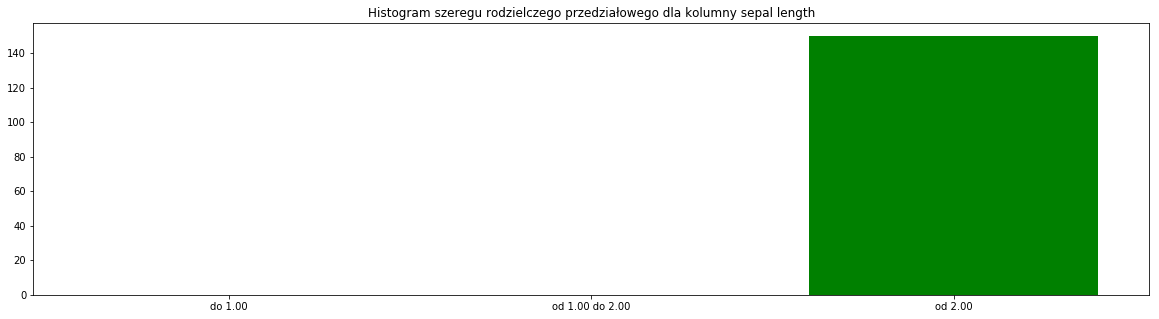

Podzielę szereg szczegółowy na szereg rozdzielczy przedziałowy dla sepal width
Podaj p: 1
Podaj q: 2
Podaj ilosc przedziałów wraz z krańcowymi: 3


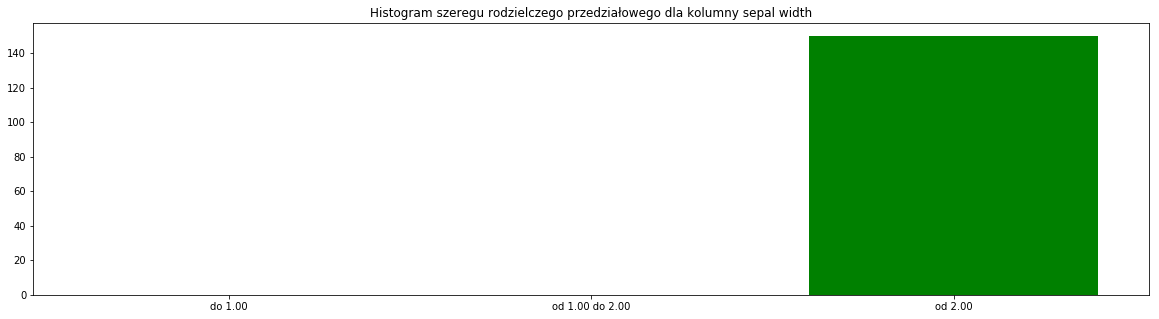

Podzielę szereg szczegółowy na szereg rozdzielczy przedziałowy dla petal length
Podaj p: 1
Podaj q: 2
Podaj ilosc przedziałów wraz z krańcowymi: 3


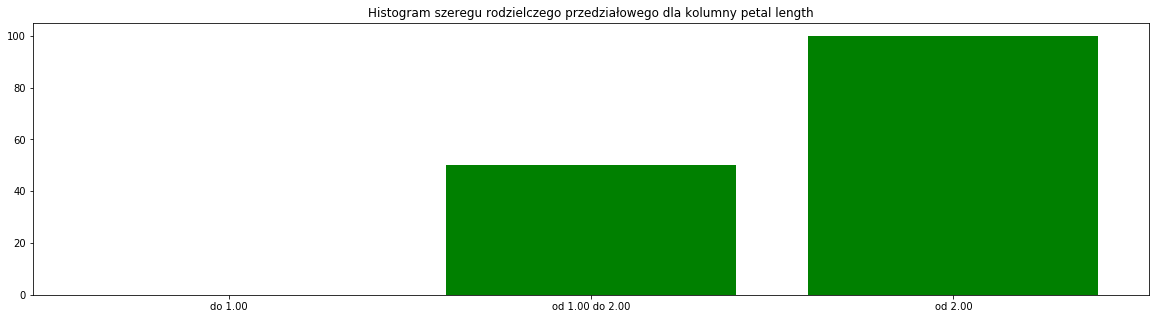

Podzielę szereg szczegółowy na szereg rozdzielczy przedziałowy dla petal width
Podaj p: 1
Podaj q: 2
Podaj ilosc przedziałów wraz z krańcowymi: 3


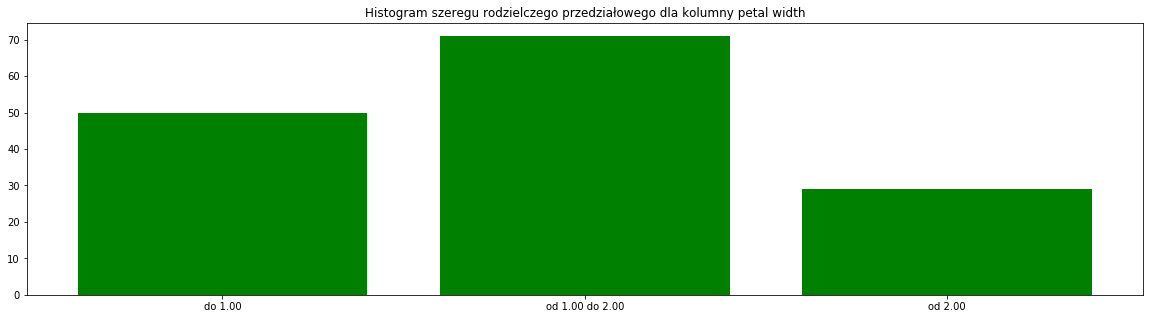

In [13]:
def szcz2przedz(szereg, w):    #zwraca szereg przedziałowy, szereg szczegółowy szereg zostaje podzielony granicami w
	szereg = sorted(szereg)
	przedz = []
	index = 0
	
	while szereg[index] < w[0]:
		index += 1
	przedz.append(index)
	
	for i in range(len(w)-2):
		tmp = index
		
		try:
			while szereg[index] < w[i+1]:
				index += 1
		except IndexError:
			print("Conajmniej jeden z wybranych przedziałów pozostanie pusty spróbuj wybrać inne przedziały")
			exit(1)
		przedz.append(index-tmp)
		
	przedz.append(len(szereg) - index)
	return przedz


for it in range(0, 4):
	print ("Podzielę szereg szczegółowy na szereg rozdzielczy przedziałowy dla", header[it])
	p = float(input("Podaj p: "))
	q = float(input("Podaj q: "))
	k = int(input("Podaj ilosc przedziałów wraz z krańcowymi: "))
	
	w = [p] #wartości z prawych krańców przedziałów
	length = (q - p) / (k - 2)
	
	for i in range(k - 2):
		w.append(p + length * (i + 1))
	
	w.append(q)
	
	#dlugosci_przedz.update( {header[it]:szcz2przedz(column2array(data, it), w)} )
	
	opis = []
	opis.append("do " + str(format(w[0], ".2f")))
	for i in range(len(w) - 2):
		opis.append("od "+str(format(w[i], ".2f"))+" do "+str(format(w[i+1], ".2f")))
	opis.append("od "+str(format(w[len(w)-1], ".2f")))
	
	plot.figure(figsize=(20,5))
	plot.bar(opis, szcz2przedz(column2array(data, it), w), color='g')
	plot.title("Histogram szeregu rodzielczego przedziałowego dla kolumny "+ header[it])
	plot.ylabel("Liczebność")
	plot.xlabel(header[it] + " [cm]")
	plot.show()

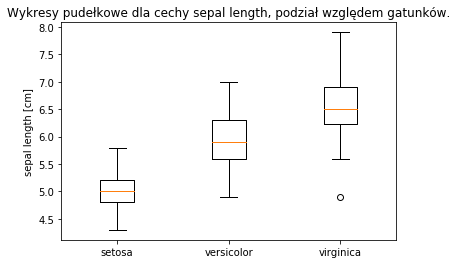

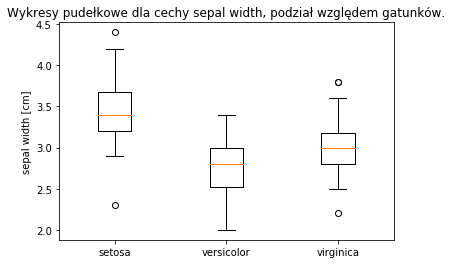

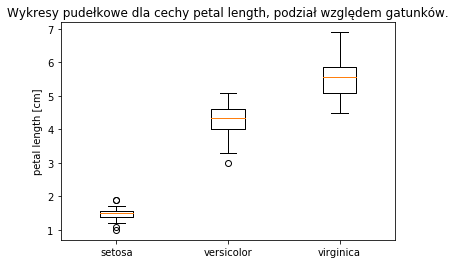

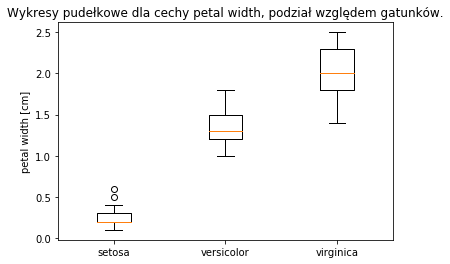

In [14]:
for it in range(0, 4):
	speciesValuesBox = []
	for rows in speciesDictionary.values():
		speciesValuesBox.append(column2array(rows, it))
	plot.boxplot(speciesValuesBox, labels=speciesDictionary.keys())
	plot.title("Wykresy pudełkowe dla cechy "+ header[it] + ", podział względem gatunków.")
	plot.ylabel(header[it] + " [cm]")
	plot.show()

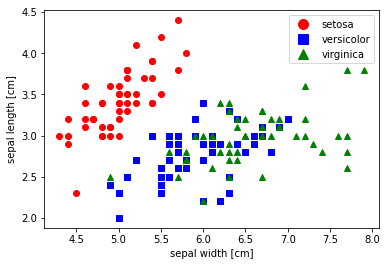

<Figure size 1080x1080 with 0 Axes>

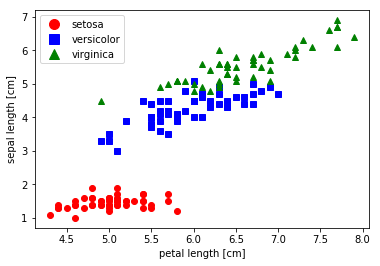

<Figure size 1080x1080 with 0 Axes>

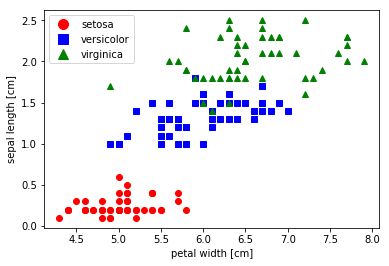

<Figure size 1080x1080 with 0 Axes>

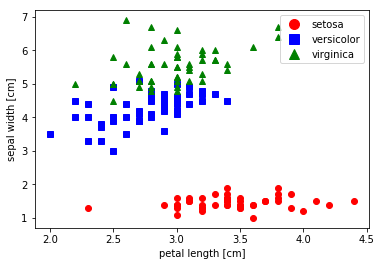

<Figure size 1080x1080 with 0 Axes>

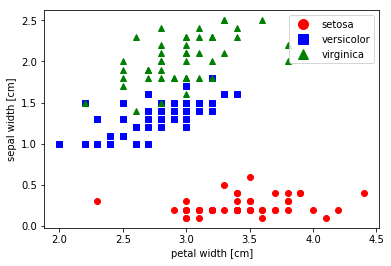

<Figure size 1080x1080 with 0 Axes>

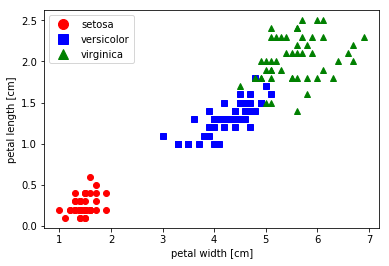

<Figure size 1080x1080 with 0 Axes>

In [37]:
for i in range(0, 3):
    for j in range(i+1, 4):
        plot.plot(column2array(speciesDictionary["setosa"], i), column2array(speciesDictionary["setosa"], j), 'ro', column2array(speciesDictionary["versicolor"], i), column2array(speciesDictionary["versicolor"], j), 'bs', column2array(speciesDictionary["virginica"], i), column2array(speciesDictionary["virginica"], j), 'g^')
        setosa_mark = mlines.Line2D([], [], color='red', marker='o', markersize=10, label='setosa', linewidth = 0)
        versicolor_mark = mlines.Line2D([], [], color='blue', marker='s', markersize=10, label='versicolor', linewidth = 0)
        virginica_mark = mlines.Line2D([], [], color='green', marker='^', markersize=10, label='virginica', linewidth = 0)
        plot.legend(handles=[setosa_mark, versicolor_mark, virginica_mark])
        plot.ylabel(header[i] + " [cm]")
        plot.xlabel(header[j] + " [cm]")
        plot.show()